# Determining Cuts

### Zoheyr Doctor, 08/31/15

####This document first plots colors, trigger timescales, follow-up g-fluxes, and time rate of change of z-flux for KN and SN sims.  These plots help to show the range of potential cutting values. Then I plot a figure of merit versus color cut, timescale cut, follow-up g-flux cut, and g-flux/zflux cut.

Get all the packages I may need:

In [12]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms

Grab all the data:

In [41]:
KNpath = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF-0/*DAT'
SNpath = "../DESY1_KNtrigger_SNEFF1_BIG/*DAT"
simtypes = ['KN','SN']
filetypes = ['sim','data']
paths = [KNpath,SNpath]
fieldtypes = ['shallow','deep']
dict1 = dict()
for f,simtype in enumerate(simtypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[simtype+'_'+fieldtype] = trigColors.trigColors(paths[f],'sim',fieldtype)
        dict1[simtype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[simtype+'_'+fieldtype]['cnites'],
                                                                                        dict1[simtype+'_'+fieldtype]['zbandinfo'],
                                                                                        dict1[simtype+'_'+fieldtype]['ibandinfo'],
                                                                                       3,10,1)

trigColors.py:54: RuntimeWarning: invalid value encountered in log10
  zmag = -2.5*np.log10(zbandinfo[i][2][zsellist[i]][0])
trigColors.py:53: RuntimeWarning: invalid value encountered in log10
  imag = -2.5*np.log10(ibandinfo[i][2][isellist[i]][0])


Below I plot the colors, follow-up gfluxes, and trigger timescales.  The colors and gfluxes are only plotted for things that trigger, have follow-up i&z observations, and don't trigger on timescales > 20 days.

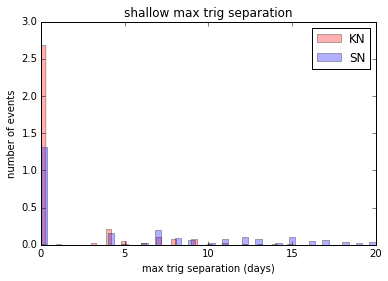

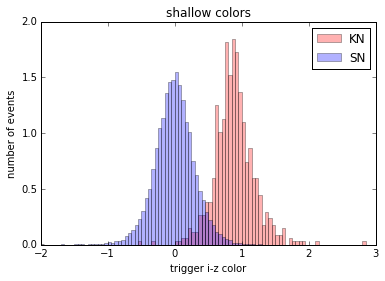

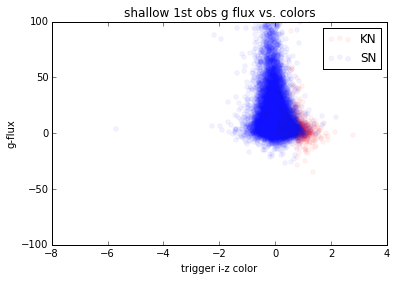

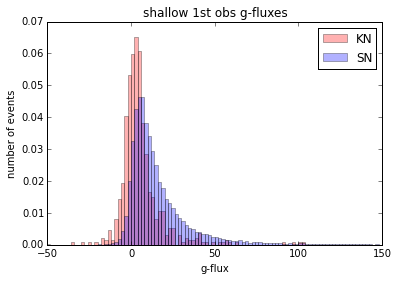

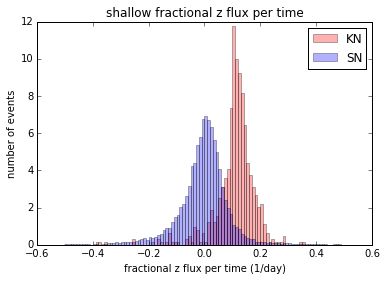

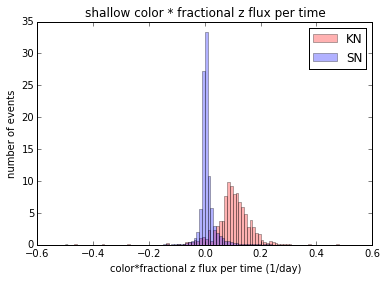

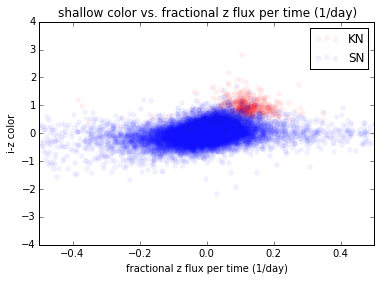

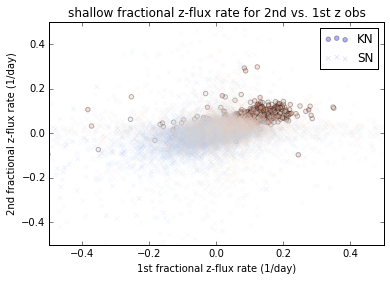

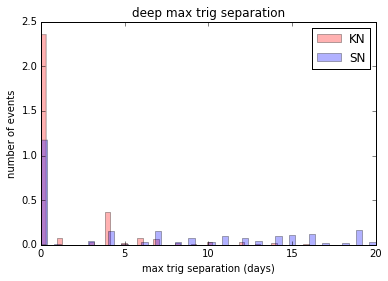

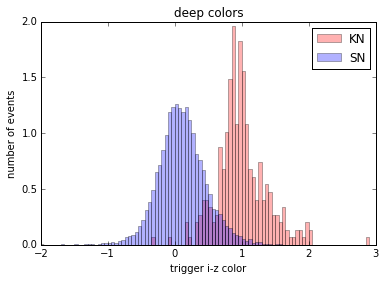

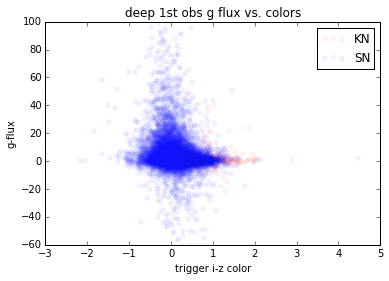

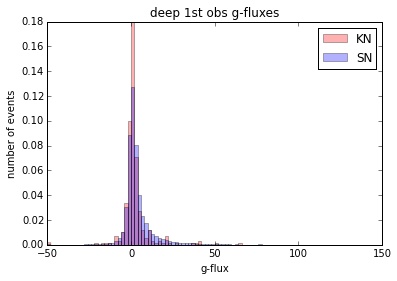

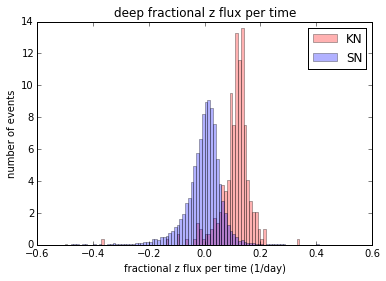

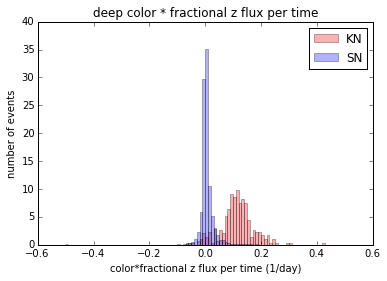

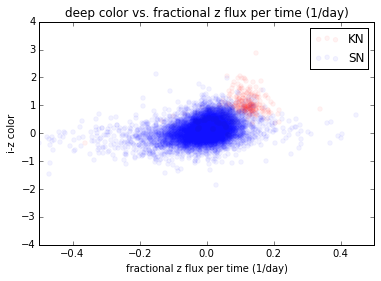

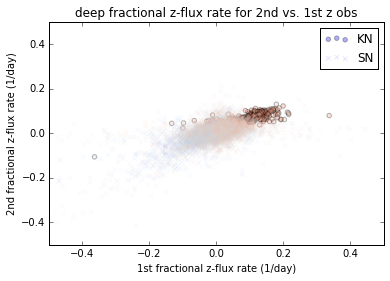

In [110]:
plottingcolors = ['r','b']
markerz = ['o','x']
alphalist = [.3,0.1]
linewidths = [4,1]
levels = np.linspace(-4,4,50)
cmap=plt.cm.coolwarm
#cmap.set_levels=(levels)
for n,fieldtype in enumerate(fieldtypes):
    fignite = plt.figure()
    fighist = plt.figure()
    figg = plt.figure()
    figghist = plt.figure()
    figzslp = plt.figure()
    figzslpcol = plt.figure()
    figislpzslp = plt.figure()
    fig8 = plt.figure()
    axnite = fignite.add_subplot(111)
    axg = figg.add_subplot(111)
    axhist = fighist.add_subplot(111)
    axghist = figghist.add_subplot(111)
    axzslp = figzslp.add_subplot(111)
    axzslpcol = figzslpcol.add_subplot(111)
    axislpzslp = figislpzslp.add_subplot(111)
    ax8 = fig8.add_subplot(111)
    for f,simtype in enumerate(simtypes):  
        KNIDlist = np.array([int(eye['SNID']) for i,eye in enumerate(dict1[simtype+'_'+fieldtype]['headers'])])
        trigsel = dict1[simtype+'_'+fieldtype]['trigs']
        detsel = dict1[simtype+'_'+fieldtype]['detections']
        multitrigsel = dict1[simtype+'_'+fieldtype]['multitrig']
        #photoZsel = ~dict1[simtype+'_'+fieldtype]['photoZcutsel']
        sel = trigsel & detsel & multitrigsel #& photoZsel
        colors = dict1[simtype+'_'+fieldtype]['colors'][sel]
        trignites = dict1[simtype+'_'+fieldtype]['cnites'][sel]
        gbandinfo = dict1[simtype+'_'+fieldtype]['gbandinfo'][sel]
        zbandinfo = dict1[simtype+'_'+fieldtype]['zbandinfo'][sel]
        ibandinfo = dict1[simtype+'_'+fieldtype]['ibandinfo'][sel]
        rbandinfo = dict1[simtype+'_'+fieldtype]['rbandinfo'][sel]
        zslopes = np.empty(len(zbandinfo))
        zslopes2 = np.empty(len(zbandinfo))
        for r,zband in enumerate(zbandinfo):
            try:
                ztrigsel = np.in1d(trignites[r],zband[1])
                ztrignite = trignites[r][ztrigsel][0]
                ztrigflux = zband[2][zband[1]==ztrignite]
                zfollownite = zband[1][zband[1]>ztrignite][0]
                zfollowflux = zband[2][zband[1]>ztrignite][0]
                zfollownite2 = zband[1][zband[1]>ztrignite][1]
                zfollowflux2 = zband[2][zband[1]>ztrignite][1]
            except IndexError:
                ztrignite = np.NAN
                ztrigflux = np.NAN
                zfollownite = np.NAN
                zfollowflux = np.NAN
                zfollownite2 = np.NAN
                zfollowflux2 = np.NAN
            #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
            try:
                zslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
            except ValueError:
                print zfollowflux,ztrigflux,zfollownite,ztrignite
            #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
            #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
            try:
                zslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
            except ValueError:
                print zfollowflux2,ztrigflux,zfollownite2,ztrignite
#         for z,Z in enumerate(zbandinfo):
#             ztrignite = Z[1][Z[0]==2][0]
#             ztrigflux = Z[2][Z[0]==2][0]
#             zfollownite = Z[1][Z[1]>ztrignite][0]
#             zfollowflux = Z[2][Z[1]>ztrignite][0]
#             try:
#                 zfollownite2 = Z[1][Z[1]>ztrignite][1]
#                 zfollowflux2 = Z[2][Z[1]>ztrignite][1]
#             except IndexError:
#                 zfollownite2 = np.NAN
#                 zfollowflux2 = np.NAN
#             #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
#             zslopes[z] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
#             #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
#             #zslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
#             zslopes2[z] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
        rslopes = np.empty(len(rbandinfo))
        for r,R in enumerate(rbandinfo):
            ztrignitesel = R[1] >= trignites[r][0]         
            try:
                rtrignite = R[1][ztrignitesel][0]
                rtrigflux = R[2][ztrignitesel][0]
                rfollownite = R[1][ztrignitesel][1]
                rfollowflux = R[2][ztrignitesel][1]
            except IndexError:
                rtrignite = np.NAN
                rtrigflux = np.NAN
                rfollownite = np.NAN
                rfollowflux = np.NAN
            rslopes[r] = (rfollowflux-rtrigflux)/(rfollownite-rtrignite)
        islopes = np.empty(len(ibandinfo))
        for i,I in enumerate(ibandinfo):
            itrignite = I[1][I[0]==2][0]
            itrigflux = I[2][I[0]==2][0]
            ifollownite = I[1][I[1]>itrignite][0]
            ifollowflux = I[2][I[1]>itrignite][0]
            islopes[i] = (ifollowflux-itrigflux)/(ifollownite-itrignite)
        gflux = np.empty(len(gbandinfo))
        gflux[:] = np.NAN
        gnxtnt = np.empty(len(gbandinfo),dtype=object)
        for i in range(0,len(gbandinfo)):
            gnxtnt[i] = (gbandinfo[i][1]>=trignites[i][0]) #& (gbandinfo[i][1]<=trignites[i][0]+10)
            try:
                gflux[i] = gbandinfo[i][2][gnxtnt[i]][0]
            except IndexError:
                pass 
        nitediff = np.empty(len(trignites))
        for i,nites in enumerate(trignites):
            nitediff[i] = np.max(nites) - np.min(nites)
        axg.scatter(colors,gflux,color=plottingcolors[f],alpha=0.05)
        axg.set_ylim(ymax=100)
        axghist.hist(gflux,color=plottingcolors[f],alpha=0.3,bins=100,range=(-50,150),normed=True)
        axhist.hist(colors,color=plottingcolors[f],alpha=0.3,bins=100,range=(-2,3),normed=True)
        axnite.hist(nitediff,color=plottingcolors[f],alpha=0.3,bins=50,normed=True)
        axzslp.hist(zslopes,color=plottingcolors[f],alpha=0.3,bins=100,normed=True,range=(-0.5,0.5))
        axzslpcol.hist(np.multiply(zslopes,colors),color=plottingcolors[f],alpha=0.3,bins=100,normed=True,range=(-0.5,0.5))
        axislpzslp.scatter(zslopes,colors,color=plottingcolors[f],alpha=0.05)
        #ax8.scatter(zslopes,zslopes2,color=plottingcolors[f],alpha=0.3)
        ax8.scatter(zslopes,zslopes2,marker=markerz[f],c=colors,alpha=alphalist[f],cmap=cmap,vmin=-2,vmax=2)
    axg.set_title(fieldtype+' 1st obs g flux vs. colors')
    axg.set_xlabel('trigger i-z color')
    axg.set_ylabel('g-flux')
    axg.legend(simtypes)
    ax8.set_title(fieldtype+' fractional z-flux rate for 2nd vs. 1st z obs')
    ax8.set_xlabel('1st fractional z-flux rate (1/day)')
    ax8.set_ylabel('2nd fractional z-flux rate (1/day)')
    ax8.set_ylim([-0.5,0.5])
    ax8.set_xlim([-0.5,0.5])
    ax8.legend(simtypes)
    axzslp.set_title(fieldtype+' fractional z flux per time')
    axzslp.set_xlabel('fractional z flux per time (1/day)')
    axzslp.set_ylabel('number of events')
    axzslp.legend(simtypes)
    axzslpcol.set_title(fieldtype+' color * fractional z flux per time')
    axzslpcol.set_xlabel('color*fractional z flux per time (1/day)')
    axzslpcol.set_ylabel('number of events')
    axzslpcol.legend(simtypes)
    axislpzslp.set_title(fieldtype+' color vs. fractional z flux per time (1/day)')
    axislpzslp.set_xlabel('fractional z flux per time (1/day)')
    axislpzslp.set_ylabel('i-z color')
    axislpzslp.set_ylim([-4,4])
    axislpzslp.set_xlim([-0.5,0.5])
    axislpzslp.legend(simtypes)
    axnite.set_title(fieldtype+' max trig separation')
    axnite.set_xlabel('max trig separation (days)')
    axnite.set_ylabel('number of events')
    axnite.legend(simtypes)
    axhist.set_title(fieldtype+' colors')
    axhist.set_xlabel('trigger i-z color')
    axhist.set_ylabel('number of events')
    axhist.legend(simtypes)
    axghist.set_title(fieldtype+' 1st obs g-fluxes')
    axghist.set_xlabel('g-flux')
    axghist.set_ylabel('number of events')
    axghist.legend(simtypes)

# Maximizing Figure of Merit

I want to determine what cuts to use.  What I'll do is maximize the Figure of Merit (defined as efficiency/Nbackground) for a bunch of different cuts. First I'll calculate the total number of simulated KN shallow and deep objects and get data from the dump file.  

In [86]:
dumpfile = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF-0/ZDNTEST_MAGOFF-0.DUMP'
dumpdata = np.genfromtxt(dumpfile,skip_header=1,names=True,dtype=None)
deepsel = (dumpdata['FIELD'] == 'X3') | (dumpdata['FIELD'] == 'C3')
shallowsel = ~deepsel
fieldsels = [shallowsel,deepsel]
Ndeep = np.sum(deepsel)
Nshallow = np.sum(shallowsel)
N_KN = [Nshallow,Ndeep]
print 'Number of simulated deep field objects: ', Ndeep
print 'Number of simulated shallow field objects: ', Nshallow

Number of simulated deep field objects:  19358
Number of simulated shallow field objects:  80642


Now that we have the total number of simulated objects, we can calculate efficiency quickly. Let's start by looking at the FoM with cuts on trigger separation, since that can quickly cut a lot of background. We'll plot the FoM over trigger separations between 1 and 20 days.

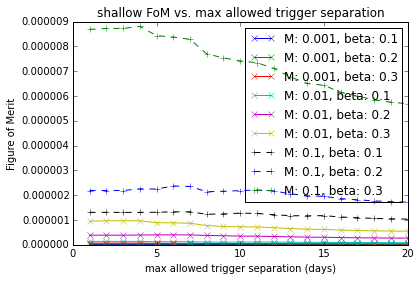

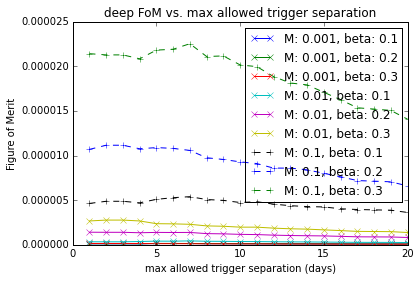

In [7]:
trigseplims = np.linspace(1,20,20)
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    plt.figure()
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNtrignites = dict1['KN_'+fieldtype]['cnites'][KNsel]
            SNtrignites = dict1['SN_'+fieldtype]['cnites'][SNsel]
            KNnitediff = np.empty(len(KNtrignites))
            SNnitediff = np.empty(len(SNtrignites))
            for k,KNnites in enumerate(KNtrignites):
                KNnitediff[k] = np.max(KNnites) - np.min(KNnites)
            for s,SNnites in enumerate(SNtrignites):
                SNnitediff[s] = np.max(SNnites) - np.min(SNnites) 
            FoM = np.empty(len(trigseplims))
            for t,trigseplim in enumerate(trigseplims):
                NKNpass = np.sum(KNnitediff < trigseplim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNnitediff < trigseplim)
                FoM[t] = efficiency/Nbackground
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            plt.plot(trigseplims,FoM,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    plt.title(fieldtype+' FoM vs. max allowed trigger separation')
    plt.xlabel('max allowed trigger separation (days)')
    plt.ylabel('Figure of Merit')
    plt.legend(legendlist)

### Figure of Merit for Flux Change Cuts

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:122: RuntimeWarning: invalid value encountered in greater
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:124: RuntimeWarning: invalid value encountered in greater
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:127: RuntimeWarning: invalid value encountered in greater
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:129: RuntimeWarning: invalid value encountered in greater


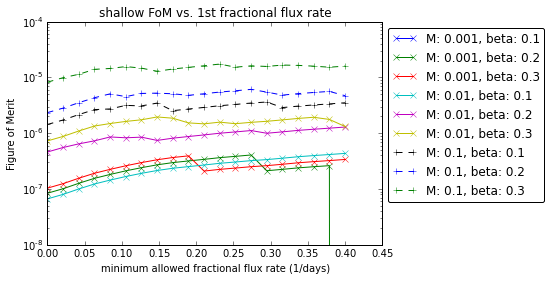

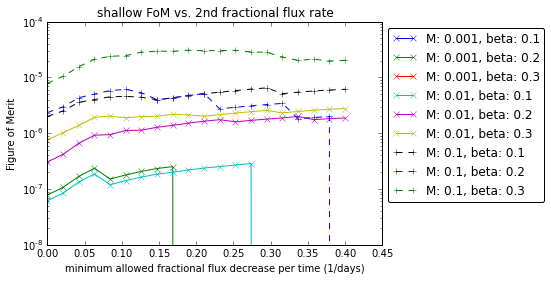

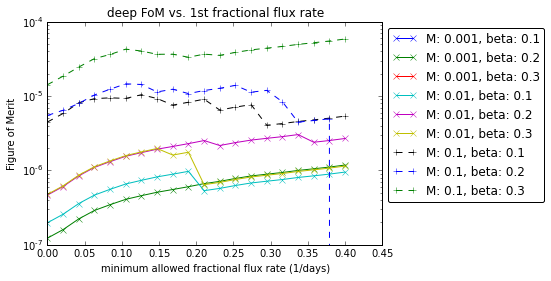

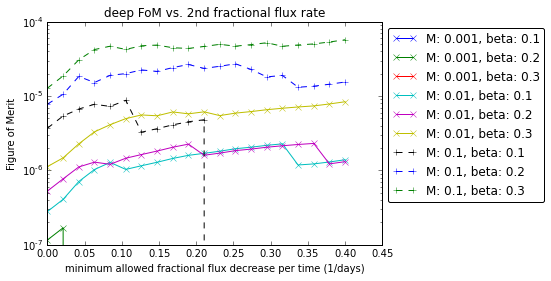

In [108]:
fluxratelims = np.linspace(0,0.4,20)
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNtrignites = dict1['KN_'+fieldtype]['cnites'][KNsel]
            SNtrignites = dict1['SN_'+fieldtype]['cnites'][SNsel]
            KNzbandinfo = dict1['KN_'+fieldtype]['zbandinfo'][KNsel]
            SNzbandinfo = dict1['SN_'+fieldtype]['zbandinfo'][SNsel]
            KNzslopes = np.empty(len(KNzbandinfo))
            KNzslopes2 = np.empty(len(KNzbandinfo))
            SNzslopes = np.empty(len(SNzbandinfo))
            SNzslopes2 = np.empty(len(SNzbandinfo))
            for r,zband in enumerate(KNzbandinfo):
                try:
                    ztrigsel = np.in1d(trignites[r],zband[1])
                    ztrignite = trignites[r][ztrigsel][0]
                    ztrigflux = zband[2][zband[1]==ztrignite]
                    zfollownite = zband[1][zband[1]>ztrignite][0]
                    zfollowflux = zband[2][zband[1]>ztrignite][0]
                    zfollownite2 = zband[1][zband[1]>ztrignite][1]
                    zfollowflux2 = zband[2][zband[1]>ztrignite][1]
                except IndexError:
                    ztrignite = np.NAN
                    ztrigflux = np.NAN
                    zfollownite = np.NAN
                    zfollowflux = np.NAN
                    zfollownite2 = np.NAN
                    zfollowflux2 = np.NAN
                #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
                try:
                    KNzslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
                except ValueError:
                    print zfollowflux,ztrigflux,zfollownite,ztrignite
                #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
                #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
                try:
                    KNzslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
                except ValueError:
                    print zfollowflux2,ztrigflux,zfollownite2,ztrignite
            for r,zband in enumerate(SNzbandinfo):
                try:
                    ztrigsel = np.in1d(trignites[r],zband[1])
                    ztrignite = trignites[r][ztrigsel][0]
                    ztrigflux = zband[2][zband[1]==ztrignite]
                    zfollownite = zband[1][zband[1]>ztrignite][0]
                    zfollowflux = zband[2][zband[1]>ztrignite][0]
                    zfollownite2 = zband[1][zband[1]>ztrignite][1]
                    zfollowflux2 = zband[2][zband[1]>ztrignite][1]
                except IndexError:
                    ztrignite = np.NAN
                    ztrigflux = np.NAN
                    zfollownite = np.NAN
                    zfollowflux = np.NAN
                    zfollownite2 = np.NAN
                    zfollowflux2 = np.NAN
                #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
                try:
                    SNzslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
                except ValueError:
                    print zfollowflux,ztrigflux,zfollownite,ztrignite
                #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
                #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
                try:
                    SNzslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
                except ValueError:
                    print zfollowflux2,ztrigflux,zfollownite2,ztrignite
#             for z,Z in enumerate(KNzbandinfo):
#                 ztrignite = Z[1][Z[0]==2][0]
#                 ztrigflux = Z[2][Z[0]==2][0]
#                 zfollownite = Z[1][Z[1]>ztrignite][0]
#                 zfollowflux = Z[2][Z[1]>ztrignite][0]
#                 try:
#                     zfollownite2 = Z[1][Z[1]>ztrignite][1]
#                     zfollowflux2 = Z[2][Z[1]>ztrignite][1]
#                 except IndexError:
#                     zfollownite2 = np.NAN
#                     zfollowflux2 = np.NAN
#                 #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
#                 KNzslopes[z] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
#                 #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
#                 #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
#                 KNzslopes2[z] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
#             for z,Z in enumerate(SNzbandinfo):
#                 ztrignite = Z[1][Z[0]==2][0]
#                 ztrigflux = Z[2][Z[0]==2][0]
#                 zfollownite = Z[1][Z[1]>ztrignite][0]
#                 zfollowflux = Z[2][Z[1]>ztrignite][0]
#                 try:
#                     zfollownite2 = Z[1][Z[1]>ztrignite][1]
#                     zfollowflux2 = Z[2][Z[1]>ztrignite][1]
#                 except IndexError:
#                     zfollownite2 = np.NAN
#                     zfollowflux2 = np.NAN
#                 #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
#                 SNzslopes[z] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
#                 #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
#                 #SNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
#                 SNzslopes2[z] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
            FoM_1 = np.empty(len(fluxratelims))
            FoM_2 = np.empty(len(fluxratelims))
            for t,fluxratelim in enumerate(fluxratelims):
                NKNpass = np.sum(KNzslopes > fluxratelim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNzslopes > fluxratelim)
                FoM_1[t] = efficiency/Nbackground
            for t,fluxratelim in enumerate(fluxratelims):
                NKNpass = np.sum(KNzslopes2 > fluxratelim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNzslopes2 > fluxratelim)
                FoM_2[t] = efficiency/Nbackground
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            ax1.plot(fluxratelims,FoM_1,linestyle=linestyle,marker=markerstyle)
            ax2.plot(fluxratelims,FoM_2,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    ax1.set_title(fieldtype+' FoM vs. 1st fractional flux rate')
    ax1.set_xlabel('minimum allowed fractional flux rate (1/days)')
    ax1.set_ylabel('Figure of Merit')
    ax1.set_yscale('log')
    ax2.set_title(fieldtype+' FoM vs. 2nd fractional flux rate')
    ax2.set_xlabel('minimum allowed fractional flux decrease per time (1/days)')
    ax2.set_ylabel('Figure of Merit')
    ax2.set_yscale('log')
    ax2.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)
    ax1.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)

## FoM for Color x Shape

In [ ]:
fluxratelims = np.linspace(0,0.4,20)
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNtrignites = dict1['KN_'+fieldtype]['cnites'][KNsel]
            SNtrignites = dict1['SN_'+fieldtype]['cnites'][SNsel]
            KNzbandinfo = dict1['KN_'+fieldtype]['zbandinfo'][KNsel]
            SNzbandinfo = dict1['SN_'+fieldtype]['zbandinfo'][SNsel]
            KNzslopes = np.empty(len(KNzbandinfo))
            KNzslopes2 = np.empty(len(KNzbandinfo))
            SNzslopes = np.empty(len(SNzbandinfo))
            SNzslopes2 = np.empty(len(SNzbandinfo))
            for r,zband in enumerate(KNzbandinfo):
                try:
                    ztrigsel = np.in1d(trignites[r],zband[1])
                    ztrignite = trignites[r][ztrigsel][0]
                    ztrigflux = zband[2][zband[1]==ztrignite]
                    zfollownite = zband[1][zband[1]>ztrignite][0]
                    zfollowflux = zband[2][zband[1]>ztrignite][0]
                    zfollownite2 = zband[1][zband[1]>ztrignite][1]
                    zfollowflux2 = zband[2][zband[1]>ztrignite][1]
                except IndexError:
                    ztrignite = np.NAN
                    ztrigflux = np.NAN
                    zfollownite = np.NAN
                    zfollowflux = np.NAN
                    zfollownite2 = np.NAN
                    zfollowflux2 = np.NAN
                #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
                try:
                    KNzslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
                except ValueError:
                    print zfollowflux,ztrigflux,zfollownite,ztrignite
                #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
                #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
                try:
                    KNzslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
                except ValueError:
                    print zfollowflux2,ztrigflux,zfollownite2,ztrignite
            for r,zband in enumerate(SNzbandinfo):
                try:
                    ztrigsel = np.in1d(trignites[r],zband[1])
                    ztrignite = trignites[r][ztrigsel][0]
                    ztrigflux = zband[2][zband[1]==ztrignite]
                    zfollownite = zband[1][zband[1]>ztrignite][0]
                    zfollowflux = zband[2][zband[1]>ztrignite][0]
                    zfollownite2 = zband[1][zband[1]>ztrignite][1]
                    zfollowflux2 = zband[2][zband[1]>ztrignite][1]
                except IndexError:
                    ztrignite = np.NAN
                    ztrigflux = np.NAN
                    zfollownite = np.NAN
                    zfollowflux = np.NAN
                    zfollownite2 = np.NAN
                    zfollowflux2 = np.NAN
                #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
                try:
                    SNzslopes[r] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
                except ValueError:
                    print zfollowflux,ztrigflux,zfollownite,ztrignite
                #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
                #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
                try:
                    SNzslopes2[r] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
                except ValueError:
                    print zfollowflux2,ztrigflux,zfollownite2,ztrignite
#             for z,Z in enumerate(KNzbandinfo):
#                 ztrignite = Z[1][Z[0]==2][0]
#                 ztrigflux = Z[2][Z[0]==2][0]
#                 zfollownite = Z[1][Z[1]>ztrignite][0]
#                 zfollowflux = Z[2][Z[1]>ztrignite][0]
#                 try:
#                     zfollownite2 = Z[1][Z[1]>ztrignite][1]
#                     zfollowflux2 = Z[2][Z[1]>ztrignite][1]
#                 except IndexError:
#                     zfollownite2 = np.NAN
#                     zfollowflux2 = np.NAN
#                 #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
#                 KNzslopes[z] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
#                 #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
#                 #KNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
#                 KNzslopes2[z] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
#             for z,Z in enumerate(SNzbandinfo):
#                 ztrignite = Z[1][Z[0]==2][0]
#                 ztrigflux = Z[2][Z[0]==2][0]
#                 zfollownite = Z[1][Z[1]>ztrignite][0]
#                 zfollowflux = Z[2][Z[1]>ztrignite][0]
#                 try:
#                     zfollownite2 = Z[1][Z[1]>ztrignite][1]
#                     zfollowflux2 = Z[2][Z[1]>ztrignite][1]
#                 except IndexError:
#                     zfollownite2 = np.NAN
#                     zfollowflux2 = np.NAN
#                 #zslopes[z] = (zfollowflux-ztrigflux)/(zfollownite-ztrignite)
#                 SNzslopes[z] = (1-zfollowflux/ztrigflux)/(zfollownite-ztrignite)
#                 #zslopes2[z] = (zfollowflux2-zfollowflux)/(zfollownite2-zfollownite)
#                 #SNzslopes2[z] = (1-zfollowflux2/zfollowflux)/(zfollownite2-zfollownite)
#                 SNzslopes2[z] = (1-zfollowflux2/ztrigflux)/(zfollownite2-ztrignite)
            FoM_1 = np.empty(len(fluxratelims))
            FoM_2 = np.empty(len(fluxratelims))
            for t,fluxratelim in enumerate(fluxratelims):
                NKNpass = np.sum(KNzslopes > fluxratelim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNzslopes > fluxratelim)
                FoM_1[t] = efficiency/Nbackground
            for t,fluxratelim in enumerate(fluxratelims):
                NKNpass = np.sum(KNzslopes2 > fluxratelim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNzslopes2 > fluxratelim)
                FoM_2[t] = efficiency/Nbackground
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            ax1.plot(fluxratelims,FoM_1,linestyle=linestyle,marker=markerstyle)
            ax2.plot(fluxratelims,FoM_2,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    ax1.set_title(fieldtype+' FoM vs. 1st fractional flux rate')
    ax1.set_xlabel('minimum allowed fractional flux rate (1/days)')
    ax1.set_ylabel('Figure of Merit')
    ax1.set_yscale('log')
    ax2.set_title(fieldtype+' FoM vs. 2nd fractional flux rate')
    ax2.set_xlabel('minimum allowed fractional flux decrease per time (1/days)')
    ax2.set_ylabel('Figure of Merit')
    ax2.set_yscale('log')
    ax2.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)
    ax1.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)

Now let's try to maximize the FoM by cutting on the first g-flux.  The histograms above suggest that we don't gain a lot by cutting on g-flux, but let's try it out anyways.  

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:46: RuntimeWarning: invalid value encountered in less
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:44: RuntimeWarning: invalid value encountered in less


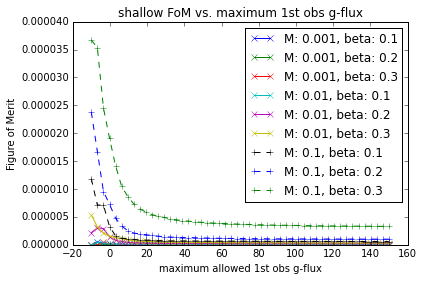

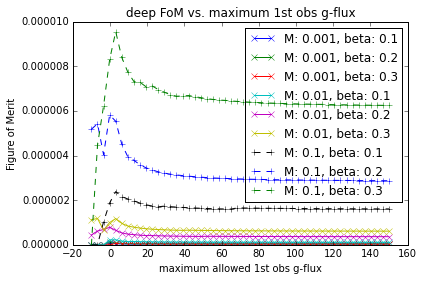

In [8]:
gfluxlims = np.linspace(-10,150,50)
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    plt.figure()
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNtrignites = dict1['KN_'+fieldtype]['cnites'][KNsel]
            SNtrignites = dict1['SN_'+fieldtype]['cnites'][SNsel]
            KNgbandinfo = dict1['KN_'+fieldtype]['gbandinfo'][KNsel]
            SNgbandinfo = dict1['SN_'+fieldtype]['gbandinfo'][SNsel]
            KNgflux = np.zeros(len(KNgbandinfo))
            SNgflux = np.zeros(len(SNgbandinfo))
            KNgflux[:] = np.NAN
            SNgflux[:] = np.NAN
            KNgnxtnt = np.empty(len(KNgbandinfo),dtype=object)
            SNgnxtnt = np.empty(len(SNgbandinfo),dtype=object)
            for i,info in enumerate(KNgbandinfo):
                KNgnxtnt[i] = (info[1]>=KNtrignites[i][0]) #& (info[1]<=KNtrignites[i][0]+10)
                try:
                    KNgflux[i] = info[2][KNgnxtnt[i]][0]
                except IndexError:
                    pass 
            for i,info in enumerate(SNgbandinfo):
                SNgnxtnt[i] = (info[1]>=SNtrignites[i][0]) #& (info[1]<=SNtrignites[i][0]+10)
                try:
                    SNgflux[i] = info[2][SNgnxtnt[i]][0]
                except IndexError:
                    pass
            FoM = np.empty(len(gfluxlims))
            for g,gfluxlim in enumerate(gfluxlims):
                NKNpass = np.sum(KNgflux < gfluxlim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNgflux < gfluxlim)
                try:
                    FoM[g] = efficiency/Nbackground
                except ZeroDivisionError:
                    FoM[g] = np.NAN
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            plt.plot(gfluxlims,FoM,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    plt.title(fieldtype+' FoM vs. maximum 1st obs g-flux')
    plt.xlabel('maximum allowed 1st obs g-flux')
    plt.ylabel('Figure of Merit')
    plt.legend(legendlist)        

Given the above plots, it seems that it may not be that helpful to cut on gflux. It may also be worth considering a different FoM. Let's now go for the color cuts, which should have the most interesting FoM graph.

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


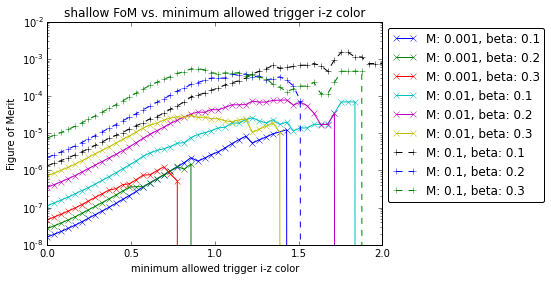

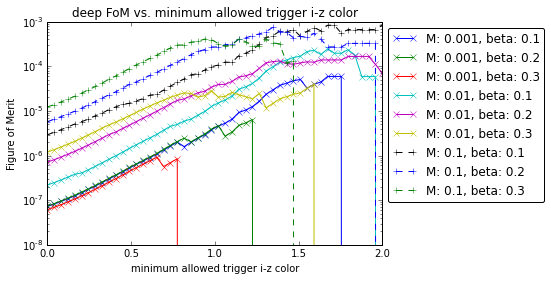

In [102]:
colorlims = np.linspace(0,2,50)
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    plt.figure()
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNcolors = dict1['KN_'+fieldtype]['colors'][KNsel]
            SNcolors = dict1['SN_'+fieldtype]['colors'][SNsel]
            FoM = np.empty(len(colorlims))
            for c,colorlim in enumerate(colorlims):
                NKNpass = np.sum(KNcolors > colorlim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNcolors > colorlim)
                try:
                    FoM[c] = efficiency/Nbackground
                except ZeroDivisionError:
                    FoM[c] = np.NAN
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            plt.plot(colorlims,FoM,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    plt.yscale('log')
    plt.title(fieldtype+' FoM vs. minimum allowed trigger i-z color')
    plt.xlabel('minimum allowed trigger i-z color')
    plt.ylabel('Figure of Merit')
    plt.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)

To maximize the FoM, we would want to cut everything with i-z less than ~0.4. 

Now let's look at the FoM for a gflux/zflux cut

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:68: RuntimeWarning: invalid value encountered in less
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:66: RuntimeWarning: invalid value encountered in less


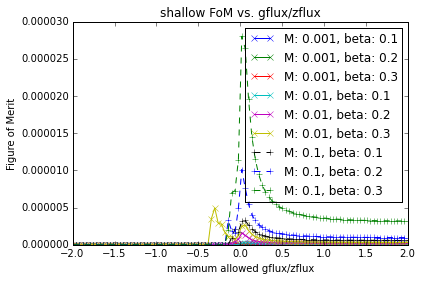

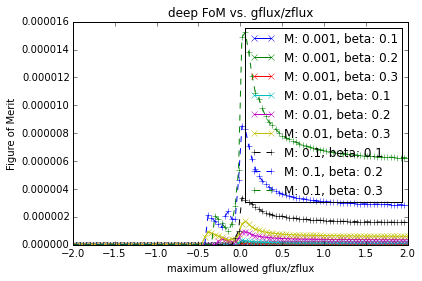

In [10]:
fluxratiolims = np.linspace(-2,2,100)
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    plt.figure()
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNtrignites = dict1['KN_'+fieldtype]['cnites'][KNsel]
            SNtrignites = dict1['SN_'+fieldtype]['cnites'][SNsel]
            KNgbandinfo = dict1['KN_'+fieldtype]['gbandinfo'][KNsel]
            SNgbandinfo = dict1['SN_'+fieldtype]['gbandinfo'][SNsel]
            KNzbandinfo = dict1['KN_'+fieldtype]['zbandinfo'][KNsel]
            SNzbandinfo = dict1['SN_'+fieldtype]['zbandinfo'][SNsel]
            KNgflux = np.zeros(len(KNgbandinfo))
            SNgflux = np.zeros(len(SNgbandinfo))
            KNgnxtnt = np.empty(len(KNgbandinfo),dtype=object)
            SNgnxtnt = np.empty(len(SNgbandinfo),dtype=object)
            KNgflux[:] = np.NAN
            SNgflux[:] = np.NAN
            for i,info in enumerate(KNgbandinfo):
                KNgnxtnt[i] = (info[1]>=KNtrignites[i][0]) #& (info[1]<=KNtrignites[i][0]+10)
                try:
                    KNgflux[i] = info[2][KNgnxtnt[i]][0]
                except IndexError:
                    pass 
            for i,info in enumerate(SNgbandinfo):
                SNgnxtnt[i] = (info[1]>=SNtrignites[i][0]) #& (info[1]<=SNtrignites[i][0]+10)
                try:
                    SNgflux[i] = info[2][SNgnxtnt[i]][0]
                except IndexError:
                    pass
            KNzflux = np.zeros(len(KNzbandinfo))
            SNzflux = np.zeros(len(SNzbandinfo))
            KNznxtnt = np.empty(len(KNzbandinfo),dtype=object)
            SNznxtnt = np.empty(len(SNzbandinfo),dtype=object)
            KNzflux[:] = np.NAN
            SNzflux[:] = np.NAN
            for i,info in enumerate(KNzbandinfo):
                KNznxtnt[i] = (info[1]>=KNtrignites[i][0]) #& (info[1]<=KNtrignites[i][0]+10)
                try:
                    KNzflux[i] = info[2][KNznxtnt[i]][0]
                except IndexError:
                    pass 
            for i,info in enumerate(SNzbandinfo):
                SNznxtnt[i] = (info[1]>=SNtrignites[i][0]) #& (info[1]<=SNtrignites[i][0]+10)
                try:
                    SNzflux[i] = info[2][SNznxtnt[i]][0]
                except IndexError:
                    pass
            FoM = np.empty(len(fluxratiolims))
            for g,fluxratiolim in enumerate(fluxratiolims):
                KNfluxratio = np.divide(KNgflux,KNzflux)
                SNfluxratio = np.divide(SNgflux,SNzflux)
                NKNpass = np.sum(KNfluxratio < fluxratiolim)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNfluxratio < fluxratiolim)
                try:
                    FoM[g] = efficiency/Nbackground
                except ZeroDivisionError:
                    FoM[g] = np.NAN
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            plt.plot(fluxratiolims,FoM,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    plt.title(fieldtype+' FoM vs. gflux/zflux')
    plt.xlabel('maximum allowed gflux/zflux')
    plt.ylabel('Figure of Merit')
    plt.legend(legendlist)        

Now let's look at photoZ cuts.  

In [11]:
reload(des_utils)
hostaccfile_s = '../hostMatching/Hostless_KN_DES_SVA1_C1.txt'
hostaccfile_d = '../hostMatching/Hostless_KN_DES_SVA1_X3.txt'
dict1['KN_deep']['HOSTGAL_PHOTOZ'],dict1['KN_deep']['DLR'],dict1['KN_deep']['SEP'] = des_utils.hostgalAssociate(infile=hostaccfile_d,headerlist=dict1['KN_deep']['headers'])
dict1['KN_shallow']['HOSTGAL_PHOTOZ'],dict1['KN_shallow']['DLR'],dict1['KN_shallow']['SEP'] = des_utils.hostgalAssociate(infile=hostaccfile_s,headerlist=dict1['KN_shallow']['headers'])
dict1['SN_deep']['HOSTGAL_PHOTOZ'],dict1['SN_deep']['SEP'] = des_utils.hostgalAssociate(headerlist=dict1['SN_deep']['headers'])
dict1['SN_shallow']['HOSTGAL_PHOTOZ'],dict1['SN_shallow']['SEP'] = des_utils.hostgalAssociate(headerlist=dict1['SN_shallow']['headers'])


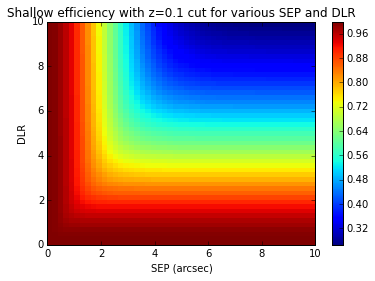

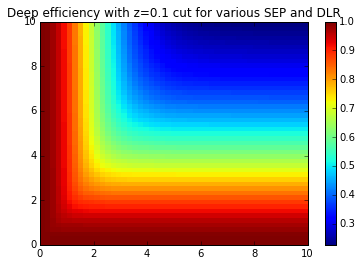

In [12]:
hostaccdata_s = np.genfromtxt(hostaccfile_s,names=True,dtype=float)
hostaccdata_d = np.genfromtxt(hostaccfile_d,names=True,dtype=float)
gridpts = 50
seplims = np.linspace(0,10,gridpts)
DLRlims = np.linspace(0,10,gridpts)
zlim = 0.1
efficiencies_d = np.empty([gridpts,gridpts])
efficiencies_s = np.empty([gridpts,gridpts])
efficiencies = [efficiencies_s,efficiencies_d]
for s,seplim in enumerate(seplims):
    for d,DLRlim in enumerate(DLRlims):
#print 'total number of shallow objects: ', len(hostaccdata_s)
#print 'total number of deep objects: ', len(hostaccdata_d)
        sepsel_s = hostaccdata_s['SEP'] > seplim
        sepsel_d = hostaccdata_d['SEP'] > seplim
        dlrsel_s = hostaccdata_s['DLR'] > DLRlim
        dlrsel_d = hostaccdata_d['DLR'] > DLRlim
        zsel_s = hostaccdata_s['ZGAL_MATCH'] < 0.1
        zsel_d = hostaccdata_d['ZGAL_MATCH'] < 0.1
        sel_s = sepsel_s | dlrsel_s | zsel_s
        sel_d = sepsel_d | dlrsel_d | zsel_d
        npass_s = np.sum(sel_s)
        npass_d = np.sum(sel_d)
        percent_remain_s = float(npass_s)/len(hostaccdata_s)
        percent_remain_d = float(npass_d)/len(hostaccdata_d)
        efficiencies_s[s,d] = percent_remain_s
        efficiencies_d[s,d] = percent_remain_d
plt.figure()
plt.pcolor(seplims,DLRlims,efficiencies_s)
plt.colorbar()
plt.xlabel('SEP (arcsec)')
plt.ylabel('DLR')
plt.title('Shallow efficiency with z=0.1 cut for various SEP and DLR')
plt.figure()
plt.pcolor(seplims,DLRlims,efficiencies_d)
plt.colorbar()
plt.title('Deep efficiency with z=0.1 cut for various SEP and DLR')
#print 'percent shallow remaining after cut: ',float(npass_s)/len(hostaccdata_s) 
#print 'percent deep remaining after cut: ',float(npass_d)/len(hostaccdata_d)

I make a color map of efficiency as a function of the minimum sep and DLR required for host galaxy association.  If there is a host galaxy association, I veto for everything above z=0.1.

<matplotlib.colorbar.Colorbar instance at 0x10aea12d8>

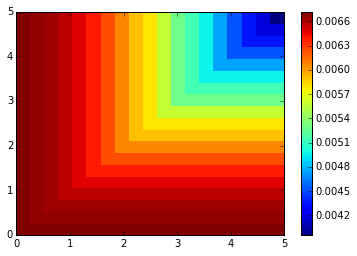

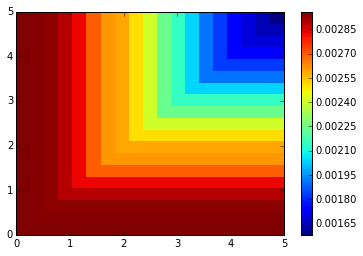

In [13]:
gridpts = 20
seplims = np.linspace(0,5,gridpts)
DLRlims = np.linspace(0,5,gridpts)
zlim = 0.1
efficiencies_d = np.empty([gridpts,gridpts])
efficiencies_s = np.empty([gridpts,gridpts])
efficiencies = [efficiencies_s,efficiencies_d]
for s,seplim in enumerate(seplims):
    for d,DLRlim in enumerate(DLRlims):
        for n,fieldtype in enumerate(fieldtypes):
            trigsel = dict1['KN_'+fieldtype]['trigs'] 
            detsel = dict1['KN_'+fieldtype]['detections']
            KNsep = dict1['KN_'+fieldtype]['SEP']
            KNdlr = dict1['KN_'+fieldtype]['SEP']
            KNz = dict1['KN_'+fieldtype]['HOSTGAL_PHOTOZ']
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID']
            zsel = KNz < zlim
            sepsel = KNsep > seplim
            dlrsel = KNdlr > DLRlim
            sel = trigsel & detsel & (zsel | sepsel | dlrsel)
            NKNpass = np.sum(sel)
            totalobj = len(dumpdata[fieldsels[n]])
            efficiency = float(NKNpass)/100000
            efficiencies[n][s,d] = efficiency
plt.figure()
plt.pcolor(seplims,DLRlims,efficiencies_s)
plt.colorbar()
plt.figure()
plt.pcolor(seplims,DLRlims,efficiencies_d)
plt.colorbar()

I require a minimum angular separation of 2 arcsec and DLR of 1.5.  The SN sims have no DLR or SEP information, but they do have host galaxy association so I ignore DLR or SEP for the sims and just put a z limit.

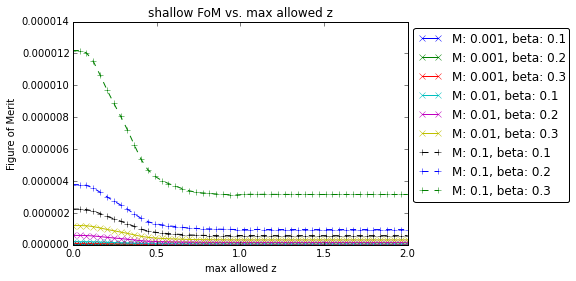

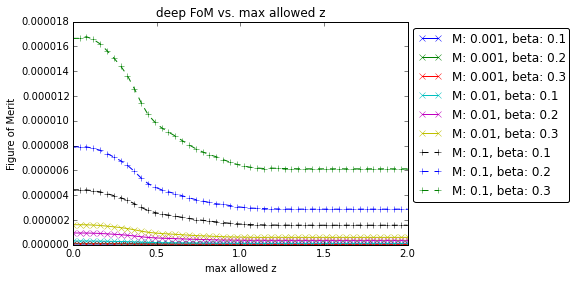

In [14]:
zlims = np.linspace(0,2,50)
seplim = 1. # arcsec
DLRlim = 1
legendlist = []
for n,fieldtype in enumerate(fieldtypes):
    f1,ax1 = plt.subplots()
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNz = dict1['KN_'+fieldtype]['HOSTGAL_PHOTOZ'][KNsel]
            SNz = dict1['SN_'+fieldtype]['HOSTGAL_PHOTOZ'][SNsel]
            KNsep = dict1['KN_'+fieldtype]['SEP'][KNsel]
            SNsep = dict1['SN_'+fieldtype]['SEP'][SNsel]
            KNdlr = dict1['KN_'+fieldtype]['DLR'][KNsel]
            FoM = np.empty(len(zlims))
            for z,zlim in enumerate(zlims):
                KNhostgalsel = (KNsep > seplim) | (KNz < zlim) | (KNdlr > DLRlim)
                SNhostgalsel = SNz < zlim
                NKNpass = np.sum(KNhostgalsel)
                efficiency = float(NKNpass)/NKNobj
                Nbackground = np.sum(SNhostgalsel)
                try:
                    FoM[z] = efficiency/Nbackground
                except ZeroDivisionError:
                    FoM[z] = np.NAN
            if m > 1:
                linestyle = '--'
                markerstyle = '+'
            else:
                linestyle = '-'
                markerstyle = 'x'
            ax1.plot(colorlims,FoM,linestyle=linestyle,marker=markerstyle)
            legendlist.append('M: '+str(M)+', beta: '+str(B))
    ax1.set_title(fieldtype+' FoM vs. max allowed z')
    ax1.set_xlabel('max allowed z')
    ax1.set_ylabel('Figure of Merit')
    ax1.legend(legendlist,loc='upper center', bbox_to_anchor=(1.25, 1.0), fancybox=True)

In [15]:
seplims = np.linspace(0,5,20)
DLRlims = np.linspace(0,5,20)
zlim = 0.1
pl.pcolor(data)
pl.colorbar()
pl.show()

NameError: name 'pl' is not defined

In [ ]:
seplim = 1. # arcsec
DLRlim = 1.5
zlim = 0.05
for n,fieldtype in enumerate(fieldtypes):
    for m,M in enumerate(M_solar):
        for b,B in enumerate(beta):
            modelselM = dumpdata['m_solar'] == M
            modelselB = dumpdata['beta_max'] == B
            modelsel = modelselM & modelselB & fieldsels[n]
            NKNobj = np.sum(modelsel)
            KNIDlistdat = [int(eye['SNID']) for i,eye in enumerate(dict1['KN_'+fieldtype]['headers'])]
            KNIDlistdump = dumpdata['CID'][modelsel]
            modelseldat = np.in1d(KNIDlistdat,KNIDlistdump)
            KNtrigsel = dict1['KN_'+fieldtype]['trigs']
            SNtrigsel = dict1['SN_'+fieldtype]['trigs']
            KNdetsel = dict1['KN_'+fieldtype]['detections']
            SNdetsel = dict1['SN_'+fieldtype]['detections']
            KNsel = KNtrigsel & KNdetsel & modelseldat
            SNsel = SNtrigsel & SNdetsel
            KNz = dict1['KN_'+fieldtype]['HOSTGAL_PHOTOZ'][KNsel]
            SNz = dict1['SN_'+fieldtype]['HOSTGAL_PHOTOZ'][SNsel]
            KNsep = dict1['KN_'+fieldtype]['SEP'][KNsel]
            SNsep = dict1['SN_'+fieldtype]['SEP'][SNsel]
            KNdlr = dict1['KN_'+fieldtype]['DLR'][KNsel]
            KNhostgalsel = (KNsep > seplim) | (KNz < zlim) | (KNdlr > DLRlim)
            NKNpass = np.sum(KNhostgalsel)
            efficiency = float(NKNpass)/NKNobj
            efficiencywithnozcut = float(np.sum(KNsel))/NKNobj
            print 'MODEL: M = '+str(M)+', beta = '+str(B)
            print 'efficiency with no z cut: ', efficiencywithnozcut
            print 'efficiency with z cut: ', efficiency
            print 'efficiency loss from zcut: ', (efficiencywithnozcut-efficiency)